In [1]:
# Import the dependencies.
from pathlib import Path
from sqlalchemy import create_engine, text
import pandas as pd
from pprint import pprint

# Create a reference to the file. 
database_path = Path("./transformed_tables/coin_Bitcoin.sqlite")

In [2]:
# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")
conn=engine.connect()

In [3]:

data = pd.read_sql("SELECT * FROM bitcoin", conn)
# Preview the Data
data.head()

,SNo,name,symbol,date,daily_high,daily_low,open_price,close_price,volume,marketcap,daily_percent_change,liquidity_ratio,true_range,average_true_range,volatility_ratio,daily_percent_change_min_max
0,1,Bitcoin,BTC,4/29/13,147.48800659179688,134.0,134.44400024414062,144.5399932861328,0,1.6037688645E9,6.984913180399877,0.0,13.488006591796875,13.488006591796875,1.0,9.145154852575695
1,2,Bitcoin,BTC,4/30/13,146.92999267578125,134.0500030517578,144.0,139.0,0,1.542813125E9,-3.597122302158273,0.0,12.879989624023438,13.183998107910156,0.9769411007648492,8.76607246040275
2,3,Bitcoin,BTC,5/1/13,139.88999938964844,107.72000122070312,139.0,116.98999786376953,0,1.29895459375E9,-18.813575979256186,0.0,32.16999816894531,19.512664794921875,1.6486727213864443,22.996639008725182
3,4,Bitcoin,BTC,5/2/13,125.5999984741211,92.28189849853516,116.37999725341797,105.20999908447266,0,1.16851749525E9,-10.61685986707116,0.0,33.31809997558594,22.96402359008789,1.4508825008334882,26.527149984361564
4,5,Bitcoin,BTC,5/3/13,108.12799835205078,79.0999984741211,106.25,97.75,0,1.08599516875E9,-8.695652173913043,0.0,29.027999877929688,24.17681884765625,1.2006542325043612,26.845960639554495


In [4]:
# save path to the old csv dataset as a variable
bit_coin_csv_path=Path("./Resources/coin_Bitcoin.csv")
# use panadas to read the data
bitcoin_df=pd.read_csv(bit_coin_csv_path)
bitcoin_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [5]:
# save path to the new csv dataset as a variable
bit_coin_csv_path=Path("./new_CSV_files/new_bitcoin.csv")
# use panadas to read the data
bitcoin_df=pd.read_csv(bit_coin_csv_path)
bitcoin_df.head() 

,SNo,name,symbol,date,daily_high,daily_low,open_price,close_price,volume,marketcap,daily_percent_change,liquidity_ratio,true_range,average_true_range,volatility_ratio,daily_percent_change_min_max
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,6.984913,0.0,13.488007,13.488007,1.000000,9.145155
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,-3.597122,0.0,12.879990,13.183998,0.976941,8.766072
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,-18.813576,0.0,32.169998,19.512665,1.648673,22.996639
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,-10.616860,0.0,33.318100,22.964024,1.450883,26.527150
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,-8.695652,0.0,29.028000,24.176819,1.200654,26.845961


In [6]:
# Query All Records in the the Database

sql_statement = "SELECT * FROM bitcoin"
with engine.begin() as conn:
    response = conn.exec_driver_sql(sql_statement).all()
    pprint(response)

[('1', 'Bitcoin', 'BTC ', '4/29/13', '147.48800659179688', '134.0', '134.44400024414062', '144.5399932861328', '0', '1.6037688645E9', '6.984913180399877', '0.0', '13.488006591796875', '13.488006591796875', '1.0', '9.145154852575695'),
 ('2', 'Bitcoin', 'BTC ', '4/30/13', '146.92999267578125', '134.0500030517578', '144.0', '139.0', '0', '1.542813125E9', '-3.597122302158273', '0.0', '12.879989624023438', '13.183998107910156', '0.9769411007648492', '8.76607246040275'),
 ('3', 'Bitcoin', 'BTC ', '5/1/13', '139.88999938964844', '107.72000122070312', '139.0', '116.98999786376953', '0', '1.29895459375E9', '-18.813575979256186', '0.0', '32.16999816894531', '19.512664794921875', '1.6486727213864443', '22.996639008725182'),
 ('4', 'Bitcoin', 'BTC ', '5/2/13', '125.5999984741211', '92.28189849853516', '116.37999725341797', '105.20999908447266', '0', '1.16851749525E9', '-10.61685986707116', '0.0', '33.31809997558594', '22.96402359008789', '1.4508825008334882', '26.527149984361564'),
 ('5', 'Bitcoi

In [7]:
# Cleaning Data
del bitcoin_df["SNo"]

In [8]:
# Renaming columns
bitcoin_df.columns = bitcoin_df.columns.str.replace("_", " ")
bitcoin_df.columns = bitcoin_df.columns.str.title()

bitcoin_df.head()

,Name,Symbol,Date,Daily High,Daily Low,Open Price,Close Price,Volume,Marketcap,Daily Percent Change,Liquidity Ratio,True Range,Average True Range,Volatility Ratio,Daily Percent Change Min Max
0,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,6.984913,0.0,13.488007,13.488007,1.000000,9.145155
1,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,-3.597122,0.0,12.879990,13.183998,0.976941,8.766072
2,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,-18.813576,0.0,32.169998,19.512665,1.648673,22.996639
3,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,-10.616860,0.0,33.318100,22.964024,1.450883,26.527150
4,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,-8.695652,0.0,29.028000,24.176819,1.200654,26.845961


In [9]:
# Adding moving averages
bitcoin_df["MA 50"] = bitcoin_df["Close Price"].rolling(window = 50).mean()
bitcoin_df["MA 100"] = bitcoin_df["Close Price"].rolling(window = 100).mean()
bitcoin_df["MA 200"] = bitcoin_df["Close Price"].rolling(window = 200).mean()

bitcoin_df.head()

,Name,Symbol,Date,Daily High,Daily Low,Open Price,Close Price,Volume,Marketcap,Daily Percent Change,Liquidity Ratio,True Range,Average True Range,Volatility Ratio,Daily Percent Change Min Max,MA 50,MA 100,MA 200
0,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,6.984913,0.0,13.488007,13.488007,1.000000,9.145155,NaN,NaN,NaN
1,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,-3.597122,0.0,12.879990,13.183998,0.976941,8.766072,NaN,NaN,NaN
2,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,-18.813576,0.0,32.169998,19.512665,1.648673,22.996639,NaN,NaN,NaN
3,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,-10.616860,0.0,33.318100,22.964024,1.450883,26.527150,NaN,NaN,NaN
4,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,-8.695652,0.0,29.028000,24.176819,1.200654,26.845961,NaN,NaN,NaN


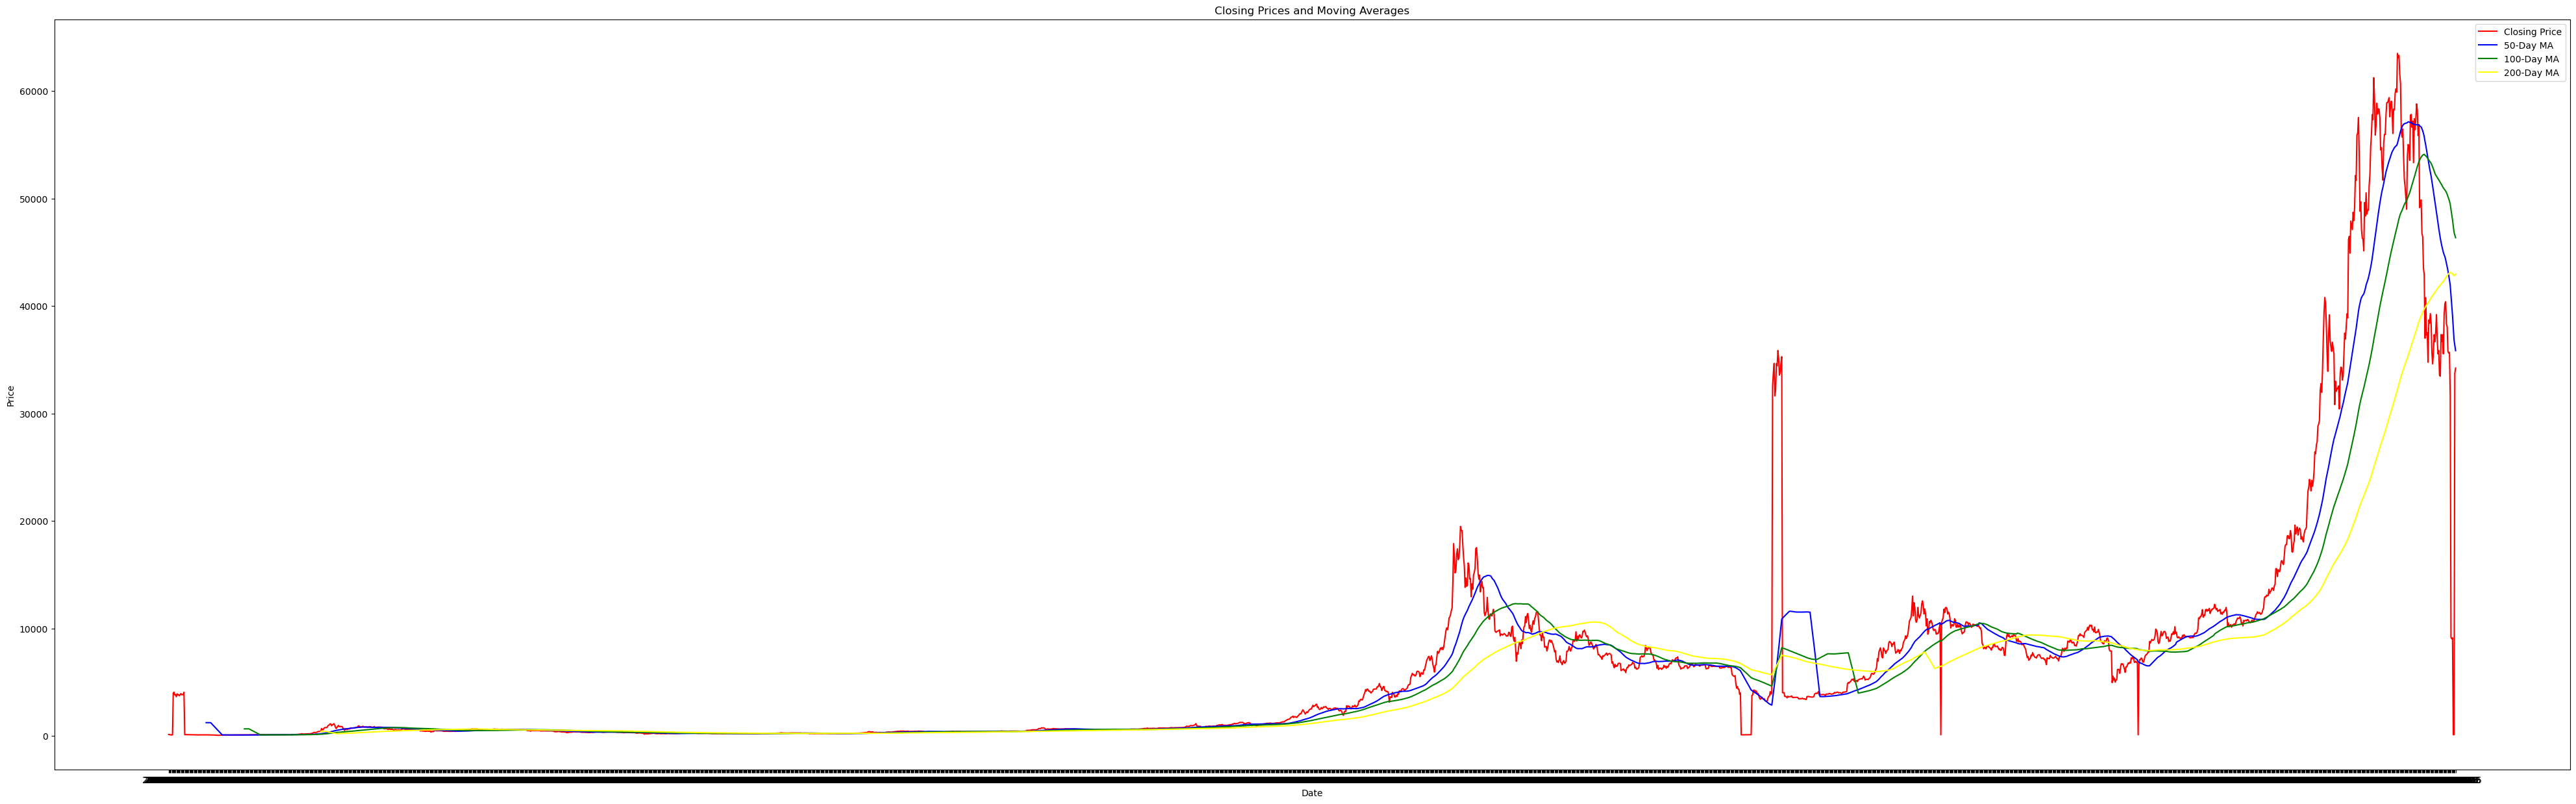

In [11]:
# Graphing Data
import matplotlib.pyplot as plt

plt.figure(figsize=(50,15))
plt.plot(bitcoin_df["Date"], bitcoin_df["Close Price"], label = "Closing Price", color = "r")
plt.plot(bitcoin_df["Date"], bitcoin_df["MA 50"], label = "50-Day MA", color = "b")
plt.plot(bitcoin_df["Date"], bitcoin_df["MA 100"], label = "100-Day MA", color = "green")
plt.plot(bitcoin_df["Date"], bitcoin_df["MA 200"], label = "200-Day MA", color = "yellow")

plt.title("Closing Prices and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()